[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/katiavela/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Numri total i postimeve: 1597
Numri i postimeve pozitive: 1415
Numri i postimeve negative: 138
Numri i postimeve neutrale: 44


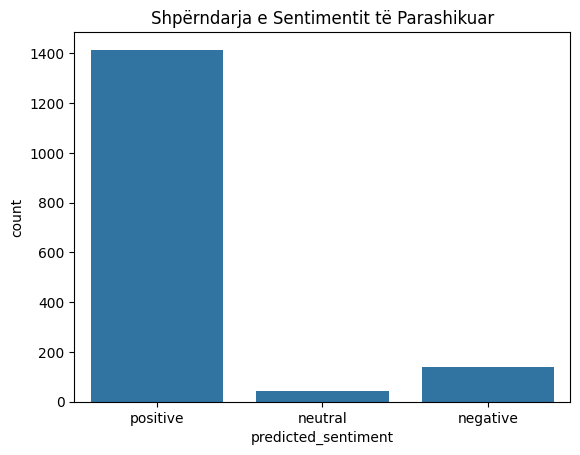

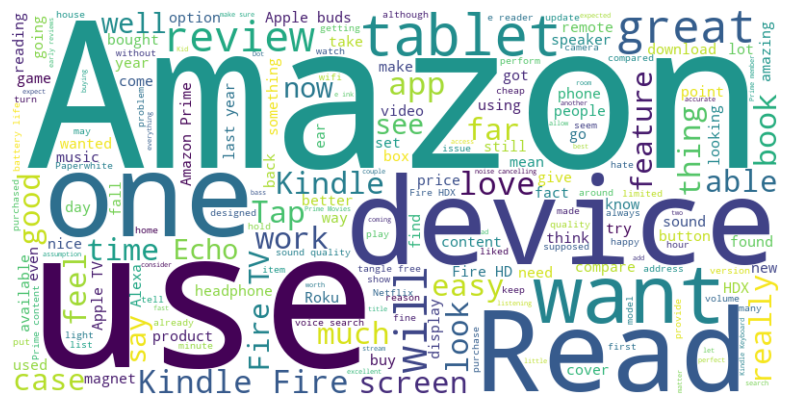

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = pd.read_csv('../data/social_media_data.csv')

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

data['compound'] = data['reviews.text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
data['predicted_sentiment'] = data['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

print("Numri total i postimeve:", len(data))
print("Numri i postimeve pozitive:", len(data[data['predicted_sentiment'] == 'positive']))
print("Numri i postimeve negative:", len(data[data['predicted_sentiment'] == 'negative']))
print("Numri i postimeve neutrale:", len(data[data['predicted_sentiment'] == 'neutral']))

sns.countplot(x='predicted_sentiment', data=data)
plt.title("Shpërndarja e Sentimentit të Parashikuar")
plt.savefig('../visualizations/sentiment_distribution.png')
plt.show()

positive_posts = ' '.join(text for text in data[data['predicted_sentiment'] == 'positive']['reviews.text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_posts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('../visualizations/positive_wordcloud.png')
plt.show()

data.to_csv('../data/social_media_data_processed.csv', index=False)



